In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('./ml_source_files/Kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
y = df['Kyphosis']
x = df.drop(['Kyphosis'], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [24]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
preds = tree.predict(x_test)
preds

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [26]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      absent       0.85      0.79      0.81        14
     present       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17



In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500) # 나무의 갯수를 파라미터로, 디폴트 100

In [28]:
rfc.fit(x_train, y_train)
preds_rfc = rfc.predict(x_test)
preds_rfc

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [29]:
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        14
     present       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
tree.feature_importances_ # 'Age', 'Number', 'Start'의 중요도를 나타내주는데 'Start'가 제일 중요하다는 거임

array([0.35412681, 0.09142857, 0.55444461])

In [31]:
rfc.feature_importances_

array([0.33832804, 0.20987395, 0.45179801])

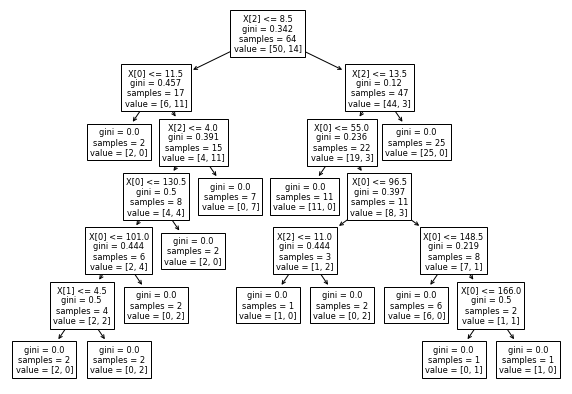

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(tree)
plt.show()